In [36]:
#import packages
import pandas as pd

#import dataset
df = pd.read_csv('Telco-Customer-Churn.csv')
#first analysis 
print(df.dtypes)
print(df.shape)
print(df.isnull().sum())
print(df.head)
print(df.describe())
#Understand why Total Charges is object type
print(df[df['TotalCharges'] == ' '])
#Convert Total Charges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')



customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object
(7043, 21)
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod

In [37]:
#data preprocessing
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(subset=['TotalCharges'], inplace=True)
df.drop(columns=['customerID'], inplace=True)
print(df['TotalCharges'].isnull().sum())

#convert binaries data 
df['gender'] = df['gender'].map({'Female': 0, 'Male': 1})
df['Partner'] = df['Partner'].map({'Yes': 1, 'No': 0})
df['PhoneService'] = df['PhoneService'].map({'Yes': 1, 'No': 0})
df['Dependents'] = df['Dependents'].map({'Yes': 1, 'No': 0})
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes': 1, 'No': 0})

#One-hot conversion for >2 categories columns
df = pd.get_dummies(df, columns=['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract', 'PaymentMethod'], drop_first=True)

0


In [39]:
#Prepare the data for ML
X = df.drop(columns=['Churn'])
y = df['Churn']

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(X_train[['tenure', 'MonthlyCharges', 'TotalCharges']])
X_test[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.transform(X_test[['tenure', 'MonthlyCharges', 'TotalCharges']])

In [40]:
#Linear regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialisation du modèle
log_model = LogisticRegression(random_state=42, max_iter=1000)

# Entraînement du modèle
log_model.fit(X_train, y_train)

# Prédictions
y_pred = log_model.predict(X_test)

# Évaluation des performances
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred))
print("\nRapport de classification :\n", classification_report(y_test, y_pred))
print("\nPrécision globale :", accuracy_score(y_test, y_pred))

Matrice de confusion :
 [[915 118]
 [182 192]]

Rapport de classification :
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407


Précision globale : 0.7867803837953091


In [21]:
for col in df.select_dtypes(include='object').columns:
    print(col, df[col].nunique())


customerID 7032
gender 2
Partner 2
Dependents 2
PhoneService 2
MultipleLines 3
InternetService 3
OnlineSecurity 3
OnlineBackup 3
DeviceProtection 3
TechSupport 3
StreamingTV 3
StreamingMovies 3
Contract 3
PaperlessBilling 2
PaymentMethod 4
Churn 2


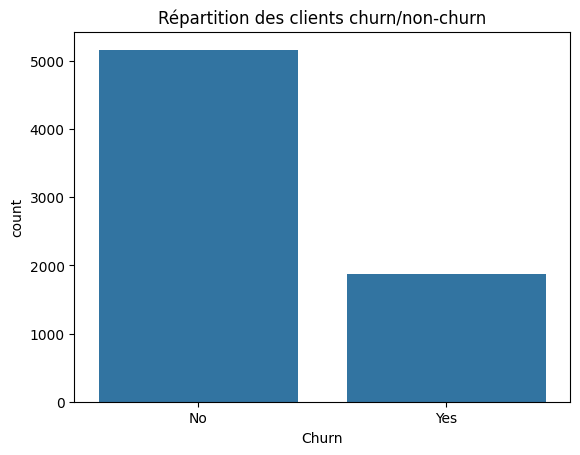

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Churn')
plt.title("Répartition des clients churn/non-churn")
plt.show()


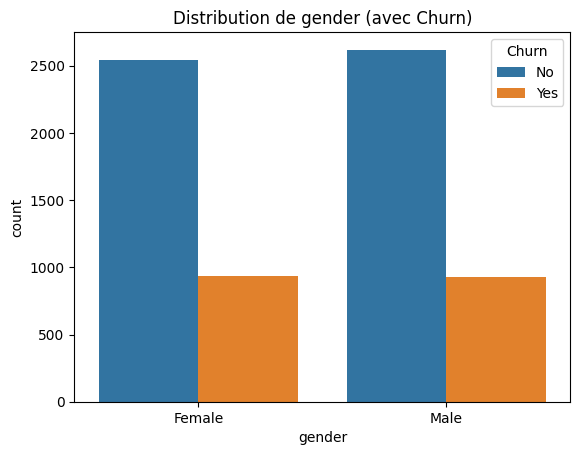

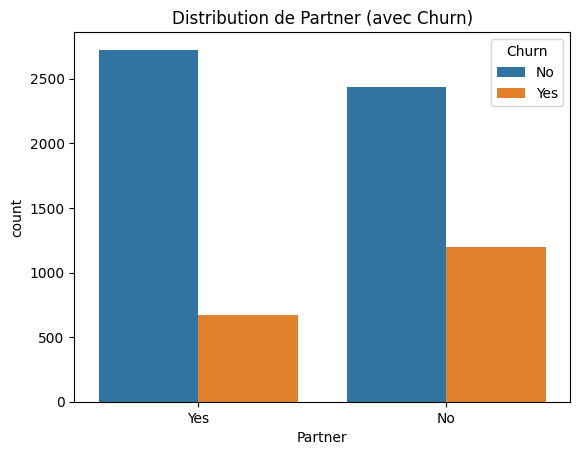

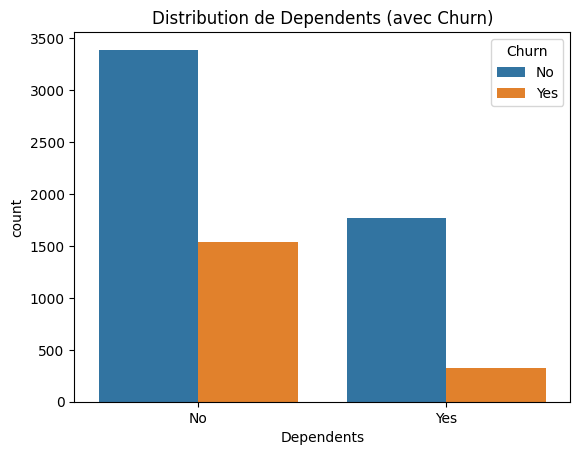

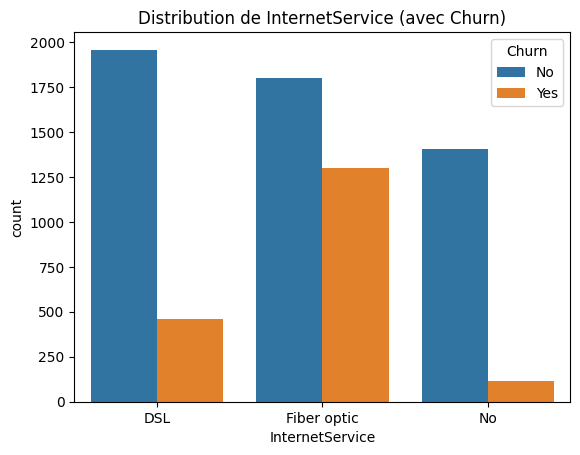

In [22]:
for col in ['gender', 'Partner', 'Dependents', 'InternetService']:
    sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f"Distribution de {col} (avec Churn)")
    plt.show()


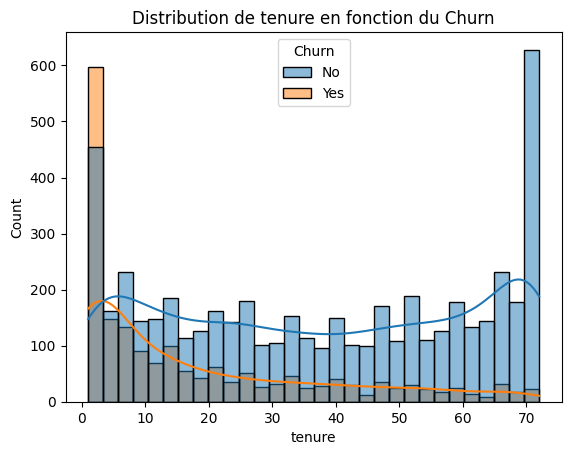

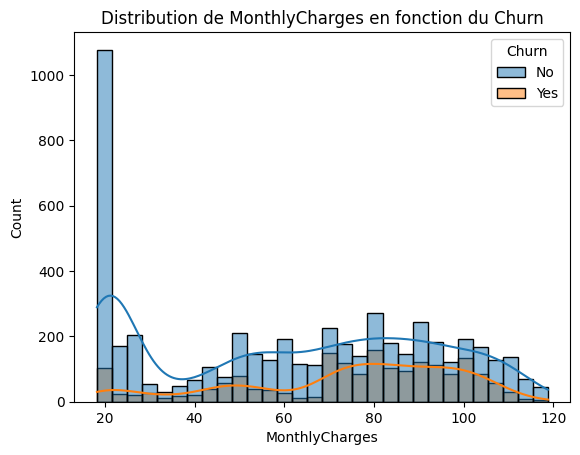

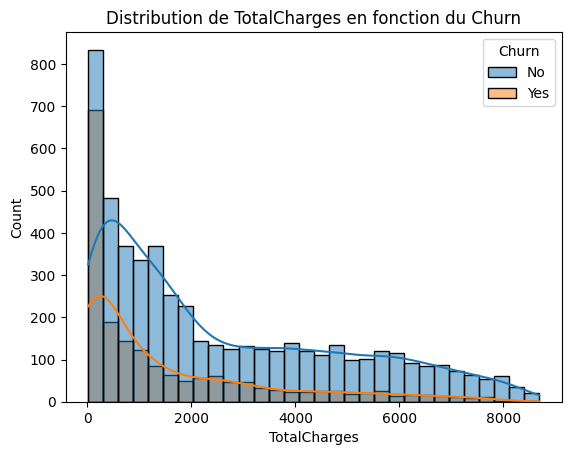

In [23]:
for col in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    sns.histplot(data=df, x=col, hue='Churn', kde=True, bins=30)
    plt.title(f"Distribution de {col} en fonction du Churn")
    plt.show()
